In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2015-01-15"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2015_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-01-15,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,10680,해운대구,3255,43.84%,"8,756"
1,2015-01-15,간장,오복왕표 0.9ℓ 1병,3963,해운대구,6550,해운대구,2587,65.28%,"5,588"
2,2015-01-15,고등어,30㎝정도 500g 1마리,3429,해운대구,3870,해운대구,441,12.86%,"3,650"
3,2015-01-15,달걀,오경슈퍼란60g정도 10개,2083,해운대구,3050,해운대구,967,46.42%,"2,678"
4,2015-01-15,닭고기,육계 1.0㎏,5800,해운대구,8900,해운대구,3100,53.45%,"7,407"
5,2015-01-15,대파,1.0㎏,2059,해운대구,3296,해운대구,1237,60.08%,"2,526"
6,2015-01-15,돼지고기,삼겹살 500g,7750,해운대구,12500,해운대구,4750,61.29%,"10,267"
7,2015-01-15,두부,500g 판두부(국산포장두부 420g) 1모,2873,해운대구,4200,해운대구,1327,46.19%,"3,686"
8,2015-01-15,라면,신라면 120g 1봉지,634,해운대구,634,해운대구,0,0.0%,634
9,2015-01-15,맥주,하이트 500㎖ 1병,1240,해운대구,1240,해운대구,0,0.0%,"1,240"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2015-04-02"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2015_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-04-02,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7395,해운대구,10680,해운대구,3285,44.42%,"8,750"
1,2015-04-02,간장,오복왕표 0.9ℓ 1병,3963,해운대구,6550,해운대구,2587,65.28%,"5,588"
2,2015-04-02,고등어,30㎝정도 500g 1마리,6376,해운대구,6376,해운대구,0,0.0%,"6,376"
3,2015-04-02,달걀,오경슈퍼란60g정도 10개,2050,해운대구,3050,해운대구,1000,48.78%,"2,633"
4,2015-04-02,닭고기,육계 1.0㎏,6106,해운대구,7550,해운대구,1444,23.65%,"6,719"
5,2015-04-02,대파,1.0㎏,2303,해운대구,3750,해운대구,1447,62.83%,"2,999"
6,2015-04-02,돼지고기,삼겹살 500g,7900,해운대구,12500,해운대구,4600,58.23%,"10,483"
7,2015-04-02,두부,500g 판두부(국산포장두부 420g) 1모,3868,해운대구,4200,해운대구,332,8.58%,"4,015"
8,2015-04-02,라면,신라면 120g 1봉지,634,해운대구,634,해운대구,0,0.0%,634
9,2015-04-02,맥주,하이트 500㎖ 1병,1240,해운대구,1240,해운대구,0,0.0%,"1,240"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2015-07-09"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2015_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-07-09,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8162,해운대구,10680,해운대구,2518,30.85%,"9,006"
1,2015-07-09,간장,오복왕표 0.9ℓ 1병,3755,해운대구,6550,해운대구,2795,74.43%,"5,518"
2,2015-07-09,고등어,30㎝정도 500g 1마리,2714,해운대구,4651,해운대구,1937,71.37%,"3,936"
3,2015-07-09,달걀,오경슈퍼란60g정도 10개,2050,해운대구,2900,해운대구,850,41.46%,"2,517"
4,2015-07-09,닭고기,육계 1.0㎏,7522,해운대구,8500,해운대구,978,13.0%,"8,011"
5,2015-07-09,대파,1.0㎏,3141,해운대구,4458,해운대구,1317,41.93%,"3,762"
6,2015-07-09,돼지고기,삼겹살 500g,10550,해운대구,12000,해운대구,1450,13.74%,"11,150"
7,2015-07-09,두부,500g 판두부(국산포장두부 420g) 1모,3868,해운대구,7300,해운대구,3432,88.73%,"5,123"
8,2015-07-09,라면,신라면 120g 1봉지,634,해운대구,634,해운대구,0,0.0%,634
9,2015-07-09,맥주,하이트 500㎖ 1병,1240,해운대구,1280,해운대구,40,3.23%,"1,253"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2015-10-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2015_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2015-10-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7604,해운대구,17880,해운대구,10276,135.14%,"11,220"
1,2015-10-08,간장,오복왕표 0.9ℓ 1병,3755,해운대구,6880,해운대구,3125,83.22%,"5,128"
2,2015-10-08,고등어,30㎝정도 500g 1마리,3300,해운대구,3804,해운대구,504,15.27%,"3,593"
3,2015-10-08,달걀,오경슈퍼란60g정도 10개,2033,해운대구,2900,해운대구,867,42.65%,"2,511"
4,2015-10-08,닭고기,육계 1.0㎏,4980,해운대구,5752,해운대구,772,15.5%,"5,366"
5,2015-10-08,대파,1.0㎏,3573,해운대구,4457,해운대구,884,24.74%,"4,118"
6,2015-10-08,돼지고기,삼겹살 500g,6750,해운대구,9250,해운대구,2500,37.04%,"7,833"
7,2015-10-08,두부,500g 판두부(국산포장두부 420g) 1모,3868,해운대구,4200,해운대구,332,8.58%,"4,089"
8,2015-10-08,라면,신라면 120g 1봉지,634,해운대구,634,해운대구,0,0.0%,634
9,2015-10-08,맥주,하이트 500㎖ 1병,1240,해운대구,1350,해운대구,110,8.87%,"1,293"


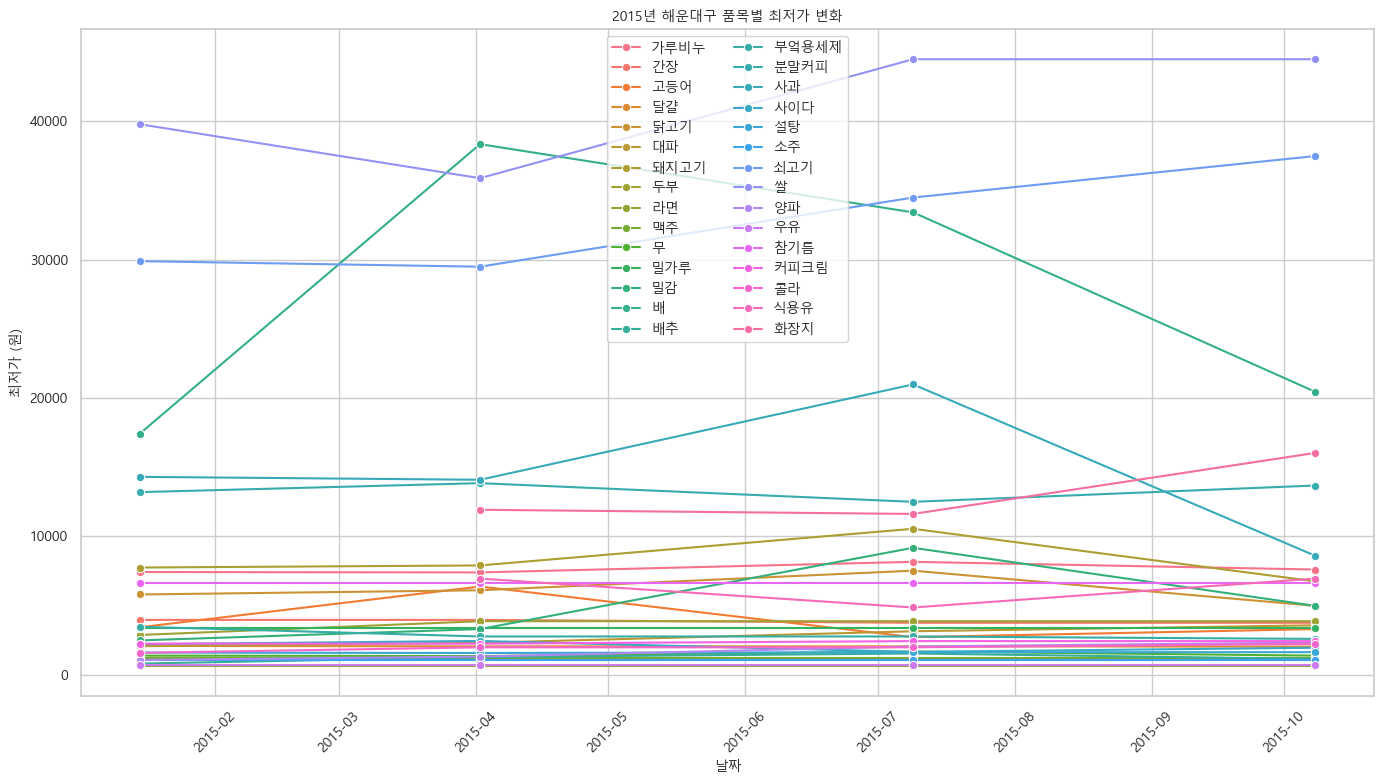

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2015_1q.csv")
q2 = pd.read_csv("해운대구2015_2q.csv")
q3 = pd.read_csv("해운대구2015_3q.csv")
q4 = pd.read_csv("해운대구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2015_min.csv", index=False, encoding="utf-8-sig")

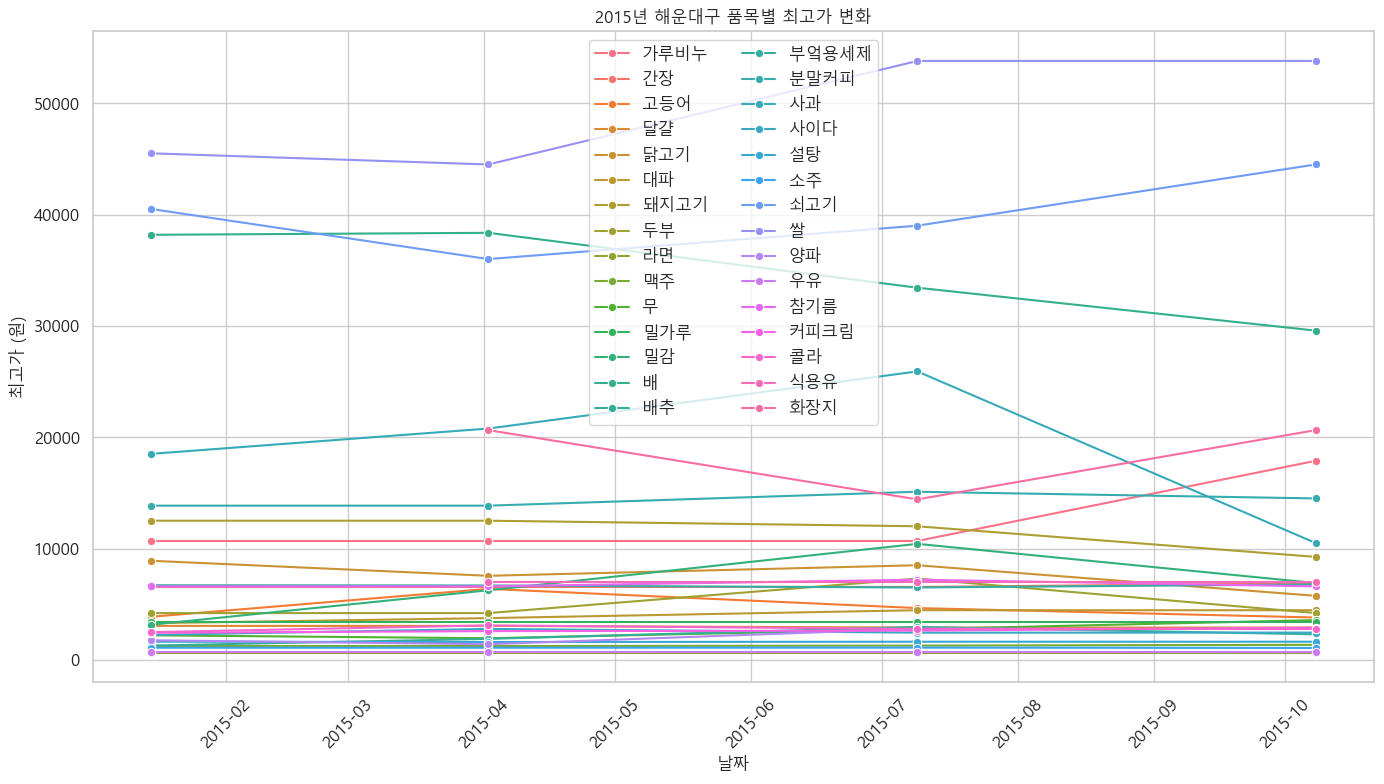

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2015_1q.csv")
q2 = pd.read_csv("해운대구2015_2q.csv")
q3 = pd.read_csv("해운대구2015_3q.csv")
q4 = pd.read_csv("해운대구2015_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2015년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2015_max.csv", index=False, encoding="utf-8-sig")